In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from pathlib import Path
import warnings; warnings.filterwarnings("ignore")

In [3]:
# Read data
project_root = Path.cwd().parent
base_path = project_root / "Dataset"
df = pd.read_csv(base_path / "quality_of_life.csv")
df.drop(["Unnamed: 0", "Rank"], axis = 1, inplace = True)
df.head()

,Country,Stability,Rights,Health,Safety,Climate,Costs,Popularity,Quality of life
0,Australia,86,92,87,100,90,23,41,76
1,San Marino,81,82,91,87,62,61,47,74
2,Hong Kong,77,85,100,97,49,61,41,74
3,Switzerland,91,99,93,99,34,44,46,74
4,Macao,90,71,100,93,48,61,44,73


In [4]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          137 non-null    object
 1   Stability        137 non-null    int64 
 2   Rights           137 non-null    int64 
 3   Health           137 non-null    int64 
 4   Safety           137 non-null    int64 
 5   Climate          137 non-null    int64 
 6   Costs            137 non-null    int64 
 7   Popularity       137 non-null    int64 
 8   Quality of life  137 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 9.8+ KB


In [5]:
# Data shape
df.shape

(137, 9)

In [6]:
# Find missing values
df.describe()

,Stability,Rights,Health,Safety,Climate,Costs,Popularity,Quality of life
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,57.576642,50.686131,58.124088,76.781022,53.233577,52.343066,37.978102,54.802920
std,19.328706,25.142755,26.093284,21.791362,19.960720,11.612897,12.050425,10.887013
min,8.000000,7.000000,0.000000,4.000000,2.000000,23.000000,11.000000,29.000000
25%,46.000000,32.000000,42.000000,69.000000,42.000000,44.000000,31.000000,47.000000
50%,57.000000,45.000000,63.000000,85.000000,53.000000,54.000000,37.000000,54.000000
75%,72.000000,72.000000,80.000000,93.000000,68.000000,61.000000,42.000000,64.000000
max,93.000000,100.000000,100.000000,100.000000,95.000000,76.000000,73.000000,76.000000


In [6]:
# Find location of missing values
np.where(df["Health"] == 0)

# Use LinearRegression to fill missing values
x_train = df.drop(["Health", "Country"], axis = 1).drop(134)
y_train = df.drop(134)["Health"]
col_dropped = df.drop(["Health", "Country"], axis = 1)
lin_reg = LinearRegression().fit(x_train.values, y_train)
pred = lin_reg.predict(pd.DataFrame(col_dropped.iloc[134].to_numpy().reshape(1, -1)))

# Replace true values
df.loc[134, "Health"] = pred

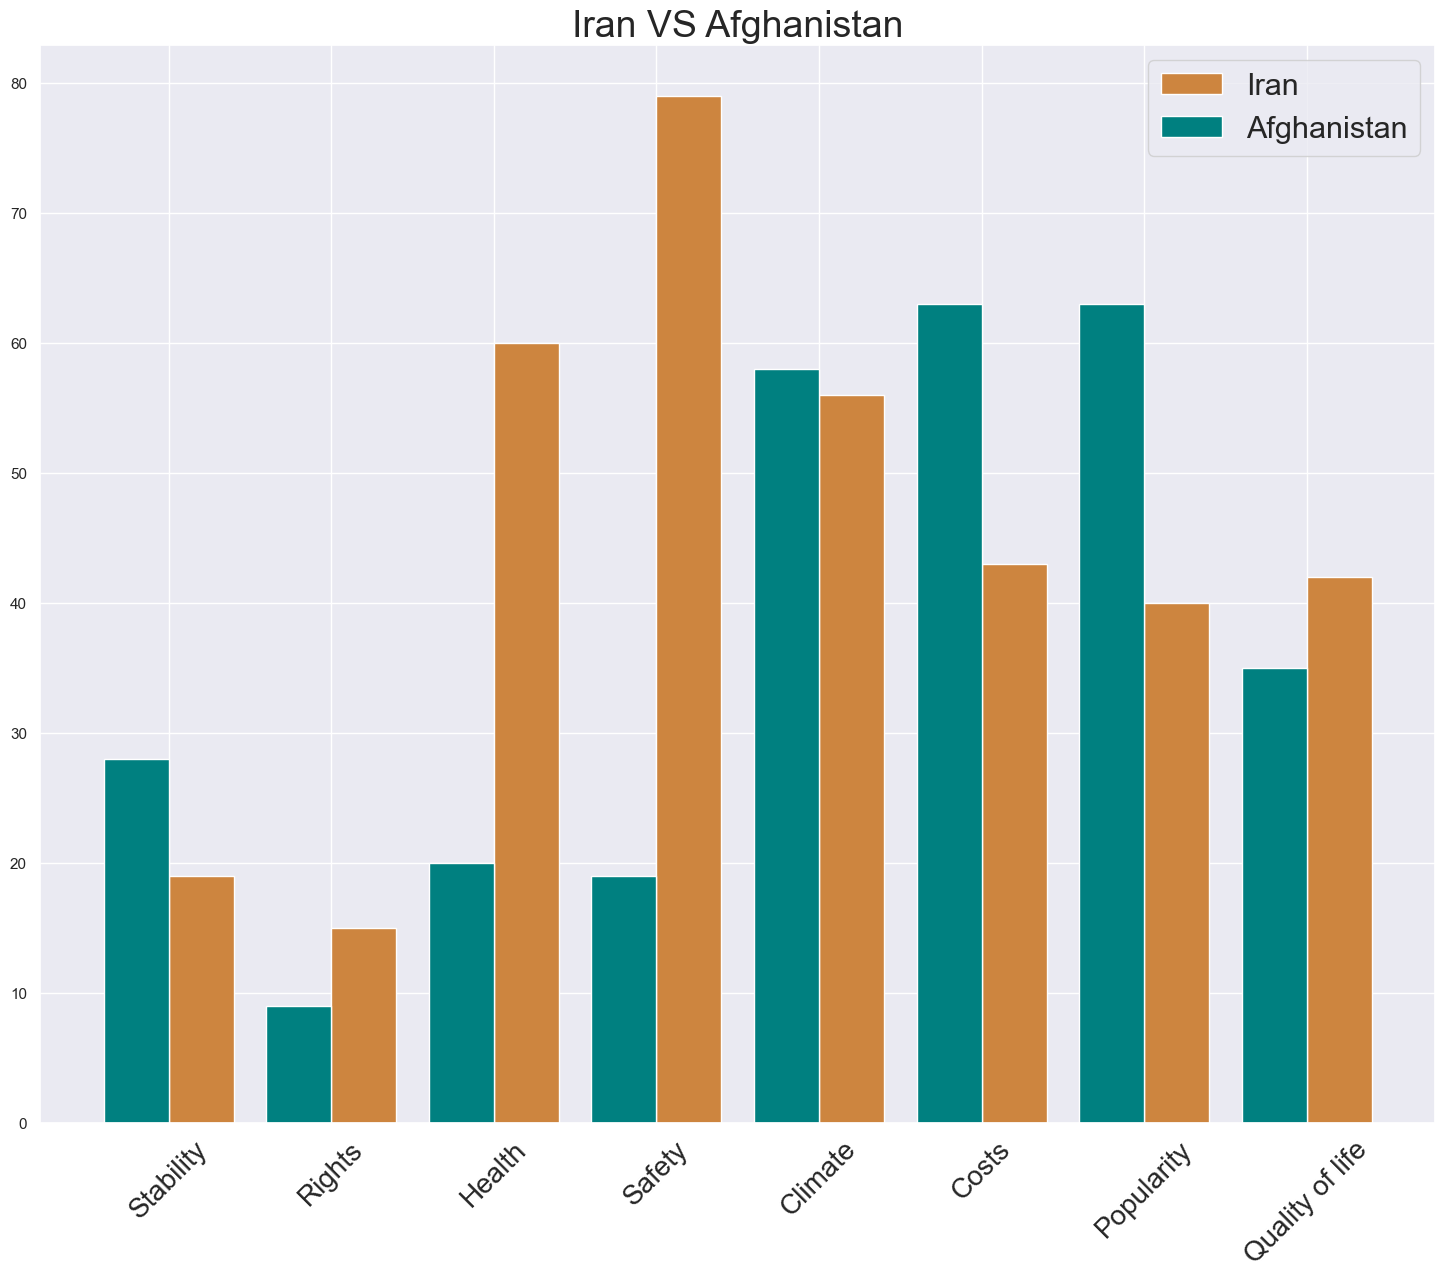

In [70]:
# Comparison of Iran and Afghanistan
iran = df.iloc[123, :]
Afgh = df.iloc[130, :]
labels = list(iran.index[1 : 9])
ticks = np.arange(8)

# Plot
plt.figure(figsize = (18, 14))
plt.bar(ticks + 0.2, list(iran.values[1 : 9]), width = 0.4, label = "Iran", color = "peru")
plt.bar(ticks - 0.2, list(Afgh.values[1 : 9]), width = 0.4, label = "Afghanistan", color = "teal")
plt.xticks(ticks, labels, rotation = 45, fontsize = 20)
plt.legend(fontsize = 22)
plt.title("Iran VS Afghanistan", fontsize = 27)
plt.savefig(project_root / "Statistical Charts/iran_afghanistan.png", dpi = 100)
plt.show()

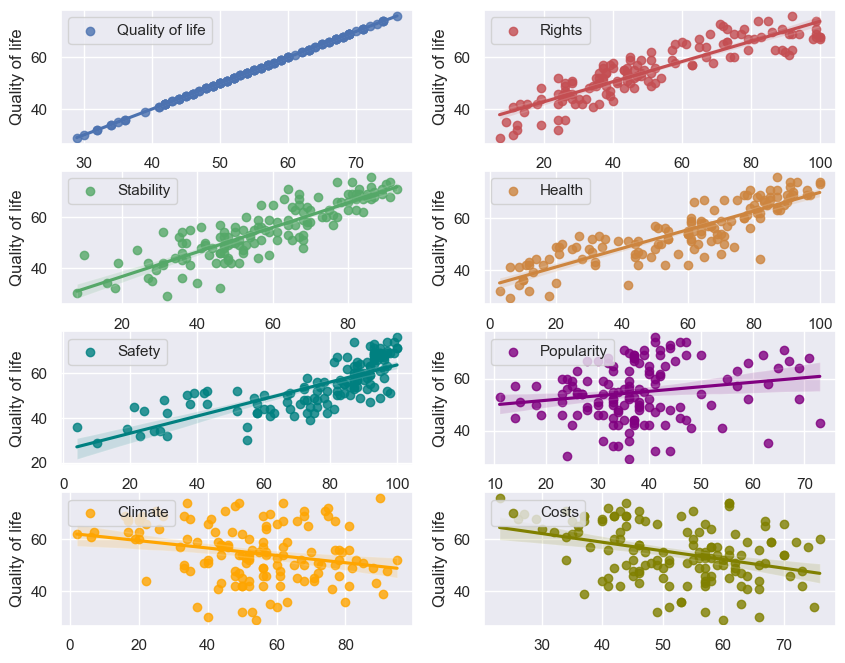

In [71]:
# Feauture regression plots
num_cols = ["Quality of life", "Rights", "Stability", "Health", "Safety", "Popularity", "Climate", "Costs"]
c = ["b", "r", "g", "peru", "teal", "purple", "orange", "olive"]
plt.figure(figsize = (10, 8), dpi = 100)
for i, c in zip(num_cols, c):
    plt.subplot(4, 2, (num_cols.index(i) + 1))
    sns.regplot(x = df[i], y = df["Quality of life"], color = c, label = i)
    plt.legend(loc = "upper left")
    plt.xlabel(None)

plt.savefig(project_root / "Statistical Charts/regression_plot.png", dpi = 100)
plt.show()

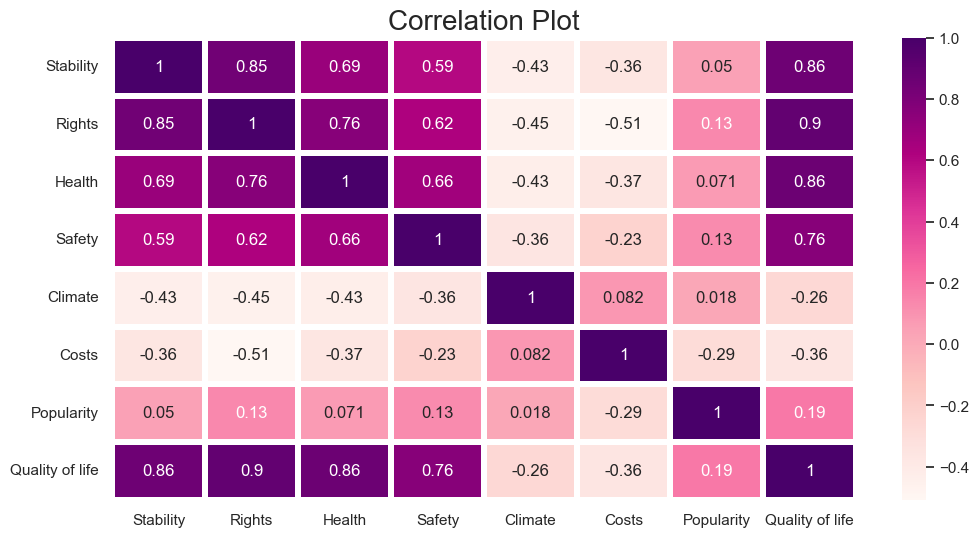

In [72]:
# Correlations
plt.figure(figsize = (12, 6))
plt.title("Correlation Plot", fontsize = 20) 
sns.heatmap(df.corr(), annot = True, linewidths = 3, cmap = "RdPu")
plt.savefig(project_root / "Statistical Charts/correlations.png", dpi = 100)
plt.show()

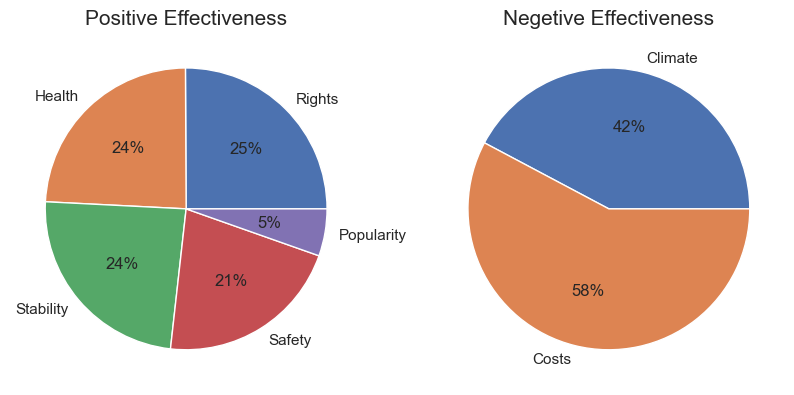

In [78]:
# Correlations
corr = df.corr().sort_values("Quality of life", ascending = False)["Quality of life"]

# Plot most effective feautures
sizes = list(corr.values[1 : 6])
labels = list(corr.index[1 : 6])

# Plotting
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, autopct="%.0f%%")
plt.title("Positive Effectiveness", fontsize = 15)
plt.subplot(1, 2, 2)
sizes = list(np.abs(corr.values[6 : 8]))
labels = list(corr.index[6 : 8])
plt.pie(sizes, labels = labels, autopct = "%.0f%%")
plt.title("Negetive Effectiveness", fontsize = 15)
plt.savefig(project_root / "Statistical Charts/Effects.png", dpi = 100)
plt.show()

In [79]:
# Groupby
df_gr = df.copy()
df_gr["Quality of life"] = pd.cut(df_gr["Quality of life"], 4, labels = ["Very Low", "Low", "High", "Very High"])
df_gr.groupby("Quality of life").mean()

,Stability,Rights,Health,Safety,Climate,Costs,Popularity
Quality of life,,,,,,,
Very Low,28.000000,15.800000,14.298001,32.700000,58.600000,56.400000,37.800000
Low,45.509804,32.705882,41.274510,65.764706,60.784314,54.627451,36.647059
High,61.790698,55.674419,67.302326,87.069767,46.488372,54.325581,35.627907
Very High,79.696970,82.545455,85.575758,93.757576,48.727273,45.000000,43.151515


In [80]:
# Manual normalization
df_n = df.copy()
for i in df_n.columns[1 : 8]:
    df_n[i] = (df_n[i] - df_n[i].min()) / (df_n[i].max() - df_n[i].min())

In [81]:
# Evaluation
x = df_n.iloc[:, 1 : 8]
y = df["Quality of life"]

# Train the model
lin_reg = LinearRegression().fit(x.values, y)

# Cross validation
scores = np.sqrt(-(cross_val_score(lin_reg, x, y, scoring = "neg_mean_squared_error", cv = 20)))
print("Mean Error:", scores.mean())
print("Max Error: ", scores.max())
print("Min Error: ", scores.min())
print("Std Error: ", scores.std())

Mean Error: 0.30308474869918656
Max Error:  0.4175555605536093
Min Error:  0.1535962089678468
Std Error:  0.08120200261737148


In [90]:
# Get coefs and bias
coefs = lin_reg.coef_
bias = lin_reg.intercept_
print("Coefs: ", coefs, "\n", "Intercept: ", bias)

Coefs:  [13.00093936 18.66267533 14.58613015  9.46655104 14.07264585  8.06146728
  6.03088905] 
 Intercept:  8.142751762237772
